# Problem Statement 1:

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.


Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

#1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
#2. Forecast the sales for each store for the next 12 weeks.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\CSV file\Walmart (1).csv",encoding='latin1')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# check how many rows and columns in dataset

In [3]:
df.shape

(6435, 8)

# Check info functiom
The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# check Standard deviation in dataset

In [6]:
df.std()

C:\Users\HP\AppData\Local\Temp/ipykernel_10072/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Store               12.988182
Weekly_Sales    564366.622054
Holiday_Flag         0.255049
Temperature         18.444933
Fuel_Price           0.459020
CPI                 39.356712
Unemployment         1.875885
dtype: float64

In [7]:
# Check total Nullvalues in all columns in Dataset 

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# Check Datatypes in all columns in Dataset 

In [10]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# to_datetime() function
The to_datetime() function is used to convert argument to datetime.

In [11]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [12]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [13]:
df["Day"] = df.Date.dt.day

In [14]:
df["Month"] = df.Date.dt.month

In [15]:
df["Year"] = df.Date.dt.year

In [16]:
df["Week"] = df.Date.dt.isocalendar().week

In [17]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,42


In [18]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Week
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12,3.106283e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02,7.421127e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02,1.277427e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02,2.361833e-01
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01,-3.240300e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02,6.041530e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01,-1.589158e-02
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03,1.037216e-01
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01,9.959843e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00,-1.819189e-01


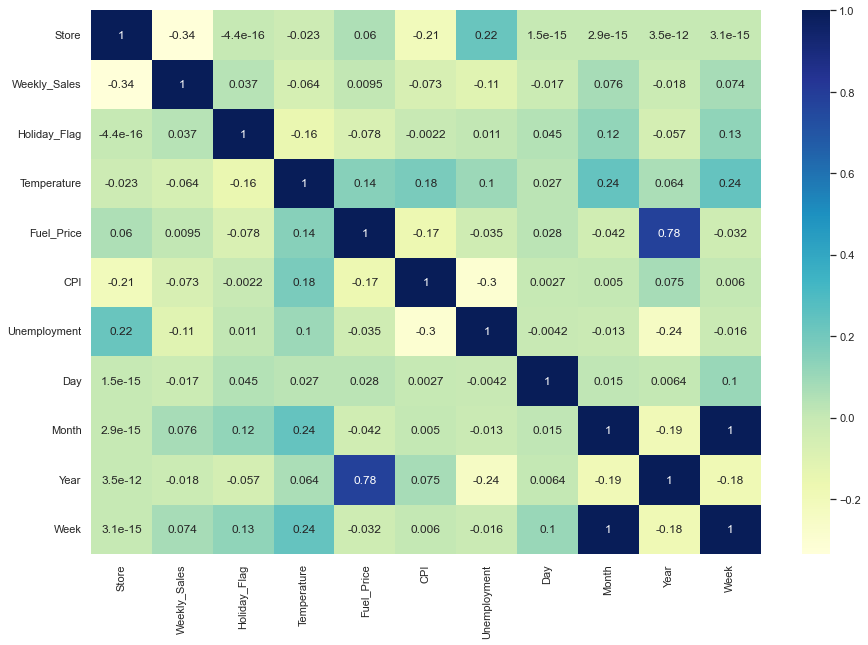

In [19]:
plt.figure(figsize=(15,10))
sns.set_theme(style='whitegrid')
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
#sns.set(rc = {'figure.figsize' : (25,20)})
plt.show()

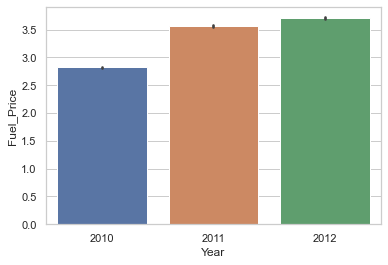

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x="Year",y="Fuel_Price",data=df)
plt.show()

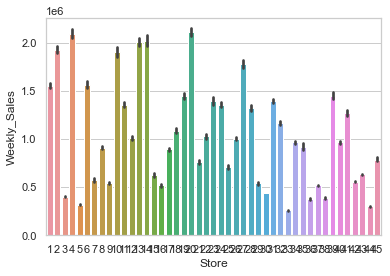

In [21]:
sns.set_theme(style="whitegrid")
sns.barplot(x="Store",y="Weekly_Sales",data=df)
sns.set(rc = {'figure.figsize' : (20,15)})
plt.show()

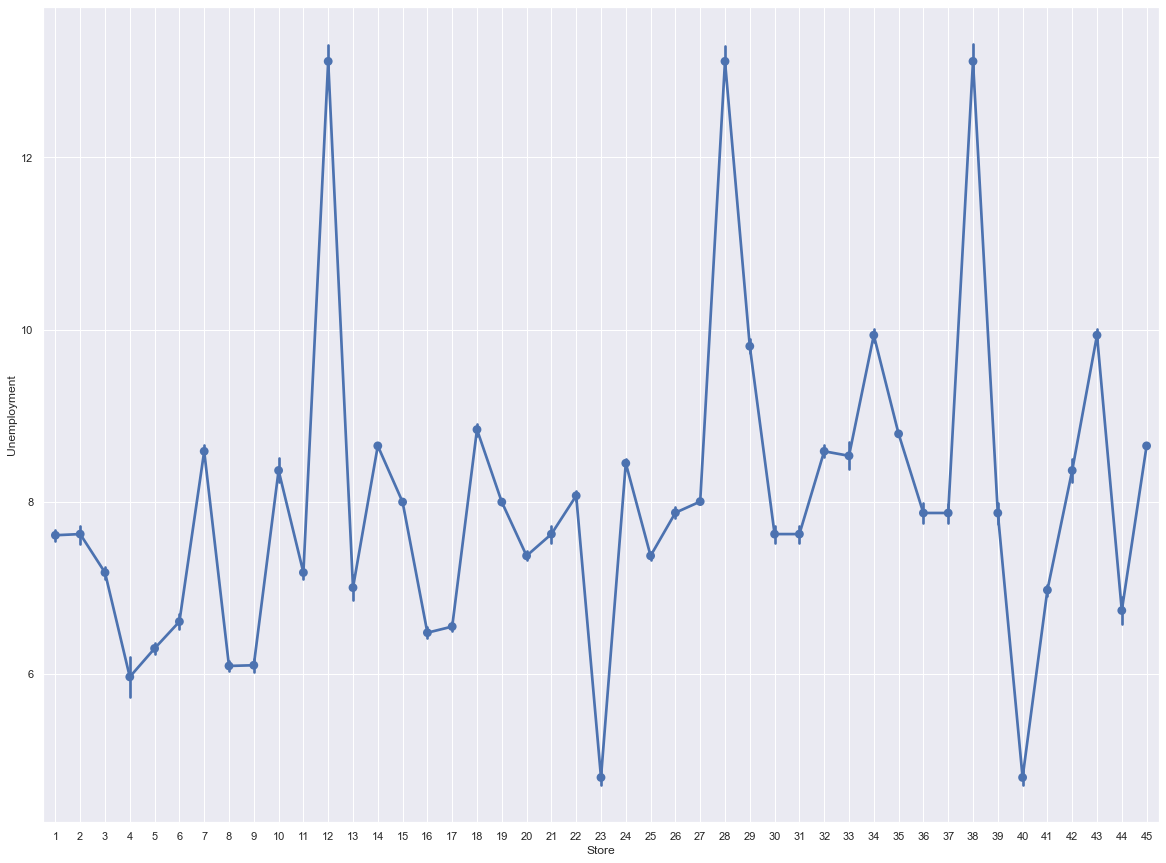

In [22]:
sns.pointplot(x="Store",y="Unemployment",data=df)
sns.set(rc = {"figure.figsize":(15,11)})
plt.grid(True)
plt.show()

In [23]:
month_wise_sales = pd.pivot_table(df,values="Weekly_Sales", columns="Year",index="Month")
month_wise_sales

Year,2010,2011,2012
Month,,,
1,NaN,9.094665e+05,9.383026e+05
2,1.057405e+06,1.035174e+06,1.067020e+06
3,1.010666e+06,9.964247e+05,1.028932e+06
4,1.028499e+06,1.006784e+06,1.049561e+06
5,1.037283e+06,1.009156e+06,1.048703e+06
6,1.068034e+06,1.054297e+06,1.069379e+06
7,1.033689e+06,1.021828e+06,1.041719e+06
8,1.042445e+06,1.047774e+06,1.052670e+06
9,9.848216e+05,9.815455e+05,1.003586e+06


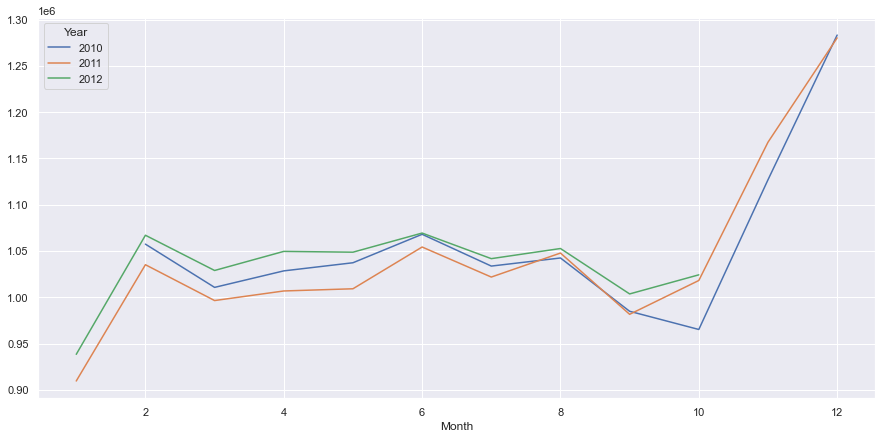

In [24]:
sns.set(rc = {"figure.figsize":(15,7)})
month_wise_sales.plot()
plt.show()

In [25]:
weekly_sales_2010 = df[df.Year==2010]
weekly_sales_2010 = weekly_sales_2010.groupby(['Week'])["Weekly_Sales"].mean()

In [26]:
weekly_sales_2011 = df[df.Year==2011]
weekly_sales_2011 = weekly_sales_2011.groupby(['Week'])['Weekly_Sales'].mean()

In [27]:
weekly_sales_2012 = df[df.Year==2012]
weekly_sales_2012 = weekly_sales_2012.groupby(['Week'])['Weekly_Sales'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


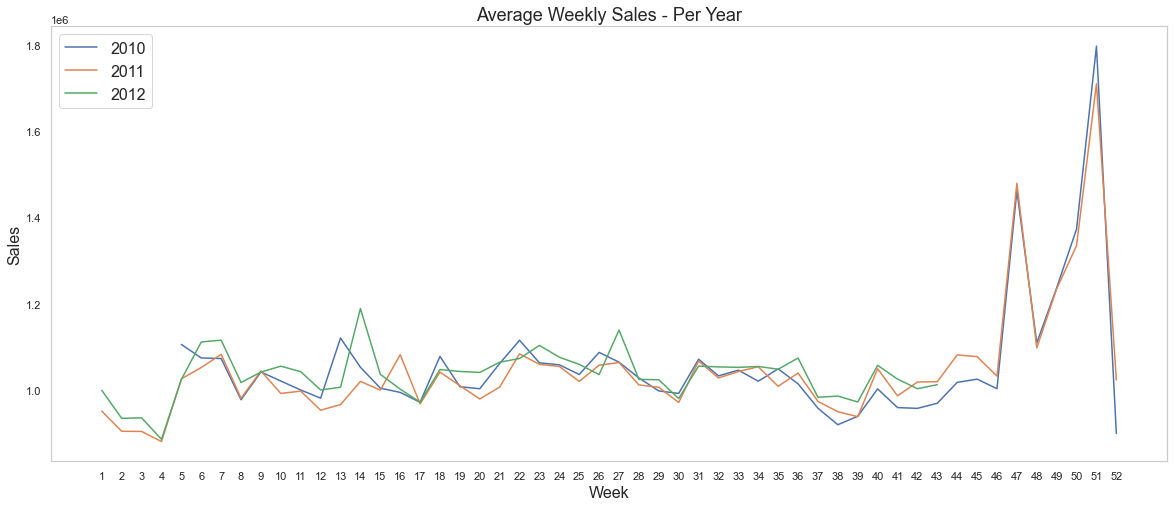

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()


In [29]:
dt = df.groupby(["Store"])["Weekly_Sales"].sum().to_frame()

In [30]:
dt.sort_values(by="Weekly_Sales",ascending=False).head(10)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [31]:
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08

SyntaxError: invalid syntax (Temp/ipykernel_10072/897345913.py, line 1)

In [ ]:
Str20 = df[df.Store == 20]
Str20.set_index("Date",inplace=True)

In [ ]:
str20 = Str20.Weekly_Sales.to_frame()
str20

In [ ]:
sns.lineplot(data=str20,x=str20.index,y="Weekly_Sales")
plt.show()

In [ ]:
str20["rollingmean"] = str20.Weekly_Sales.rolling(window=16).mean()
str20["rollingstd"] = str20.Weekly_Sales.rolling(window=16).std()

In [ ]:
sns.lineplot(data=str20,x=str20.index,y='Weekly_Sales')
sns.lineplot(data=str20,x=str20.index,y='rollingmean')
sns.lineplot(data=str20,x=str20.index,y='rollingstd')
plt.show()

In [ ]:
#Augmented Dickey-Fuller Test (ADF) Statistical Test{--adfuller }
import statsmodels

from statsmodels.tsa.stattools import adfuller
rslt = adfuller(str20["Weekly_Sales"])
print(rslt)

In [ ]:
3.491295283812896*2.718281828459045**-6

# Conclusion

You have now learned how to test for stationarity using the Augmented Dickey-Fuller Test (ADF) and are able to interpret the test using the P-Value or the Critical Values returned by the test. We created our own class which implements the ADF test from the statsmodels python package. Knowledge of this statistical test will greatly help you when you are building time series forecasting models in which stationarity is many times a strong underlying assumption for various models.



In [ ]:
str20.drop(["rollingmean","rollingstd"],axis=1,inplace=True)

In [ ]:
def test_str(dataframe, var):
    dataframe["rollingmean"] = dataframe.Weekly_Sales.rolling(window=16).mean()
    dataframe["rollingstd"] = dataframe.Weekly_Sales.rolling(window=16).std()
    
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(dataframe[var])
    stats = pd.Series(result[0:4],index=["T-stats","p-value","#lagused","num of obs used"])
    print(stats)
    
    for key, values in result[4].items():
        print("criticality",key,";",values)
        
    
    sns.lineplot(data=dataframe,x=str20.index,y='Weekly_Sales')
    sns.lineplot(data=dataframe,x=str20.index,y='rollingmean')
    sns.lineplot(data=dataframe,x=str20.index,y='rollingstd')   

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
2.718281828459045

In [ ]:
3.491295283812896*2.718281828459045**-6

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(str20.Weekly_Sales)
pacf_plot=pacf(str20.Weekly_Sales)
plot_acf(acf_plot)
plot_pacf(pacf_plot,lags=10)

In [ ]:
train = str20[:round(len(str20)*70/100)]
test = str20[round(len(str20)*70/100):]
train

In [ ]:
len(test)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train["Weekly_Sales"],order=(1,1,1))

In [ ]:
model_fit = model.fit()

In [ ]:
prediction = model_fit.predict(start=test.index[0],
                              end=test.index[-1],
                              dynamic=True)

In [ ]:
prediction

In [ ]:
str20["arimapred"] = prediction

In [ ]:
str20

In [ ]:
2.495665*10**6

In [ ]:
str20.dropna()
sns.lineplot(data=str20,x=str20.index,y="Weekly_Sales")
sns.lineplot(data=str20,x=str20.index,y="arimapred")

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test["Weekly_Sales"],prediction))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [ ]:
model = SARIMAX(train["Weekly_Sales"],order=(1,1,1),seasonal_order=(1,1,1,12))

In [ ]:
model_fit = model.fit()

In [ ]:
prediction = model_fit.predict(start=test.index[0],
                              end=test.index[-1],
                              dynamic=True)

In [ ]:
str20["sarimapred"] = prediction

In [ ]:
str20.tail()

In [ ]:
str20.dropna()
sns.lineplot(data=str20,x=str20.index,y="Weekly_Sales")
sns.lineplot(data=str20,x=str20.index,y="sarimapred")

In [ ]:
2012-10-26

In [ ]:
from datetime import datetime ,timedelta
start_date = str20.index[-1] + timedelta(weeks=5)
end_date= start_date +timedelta(weeks=12)

In [ ]:
forecast = model_fit.forecast(steps=12)
str20.plot()
forecast.plot()

In [ ]:
furturedates = pd.date_range(start=start_date,end=end_date, freq='W').to_frame()

In [ ]:
furturedates.reset_index(inplace=True)

In [ ]:
furturedates.drop(0,axis=1,inplace=True)

In [ ]:
furturedates.rename(columns={'index':'Dates'},inplace=True)

In [ ]:
furturedates.set_index("Dates",inplace=True)

In [ ]:
furturedates

In [ ]:
model_fit.predict(start=furturedates.index[0],end=furturedates.index[-1])

In [ ]:
str20.dropna()
sns.lineplot(data=str20,x=str20.index,y="Weekly_Sales")
sns.lineplot(data=str20,x=str20.index,y="sarimapred")
model_fit.predict(start=furturedates.index[0],end=furturedates.index[-1]).plot()